# NAIVE BAYES

Naïve Bayes adalah algoritma klasifikasi berbasis Teorema Bayes yang mengasumsikan bahwa setiap fitur dalam dataset saling independen (ini sebabnya disebut naïve atau "naif").

# LANGKAH LANGKAH NAIVE BAYES

1. Hitung Prior Probability
Prior probability (
𝑃
(
𝐶
)
P(C)) adalah probabilitas awal suatu kelas sebelum melihat fitur-fitur data. Ini dihitung sebagai:

  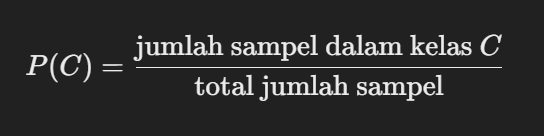

  Misalnya, jika ada 100 data dan 40 di antaranya kelas A, maka:

  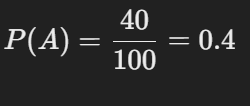

2. Hitung Parameter Distribusi Gaussian (Mean & Variance)
Karena kita pakai Gaussian Naïve Bayes, kita asumsikan bahwa setiap fitur memiliki distribusi normal dalam setiap kelas. Untuk setiap fitur
𝑋
𝑖​
 , kita hitung:

- Mean (Rata-rata):
  
  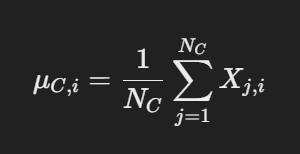


- Variance (Variansi):

  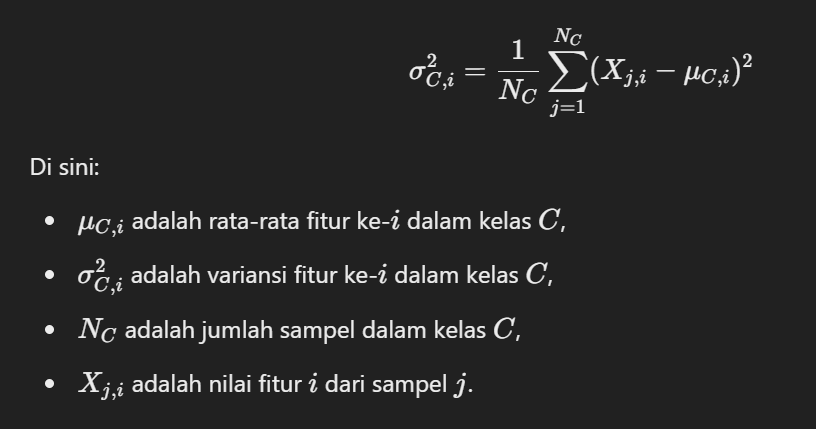



3. Hitung Likelihood dengan Distribusi Gaussian
Likelihood
𝑃
(
𝑋
∣
𝐶
)
P(X∣C) menunjukkan probabilitas mendapatkan nilai fitur
𝑋
 dalam kelas
𝐶
. Untuk distribusi Gaussian:

  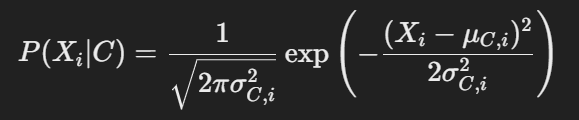

  Kita lakukan ini untuk semua fitur
𝑋
1
,
𝑋
2
,
.
.
.
,
𝑋
𝑛
X
1
​
 ,X
2
​
 ,...,X
n
​
   dalam dataset.


4. Hitung Posterior Probability
Menggunakan Teorema Bayes, kita bisa menghitung probabilitas kelas
𝐶
 diberikan fitur
𝑋
:

  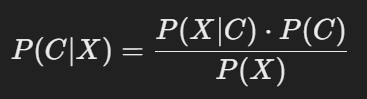

  Karena
𝑃
(
𝑋
)
P(X) adalah konstanta untuk semua kelas, kita hanya fokus pada pembilangnya:

  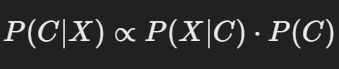

  Karena fitur dianggap independen dalam Naïve Bayes, kita hitung
𝑃
(
𝑋
∣
𝐶
)
P(X∣C) sebagai perkalian likelihood tiap fitur:

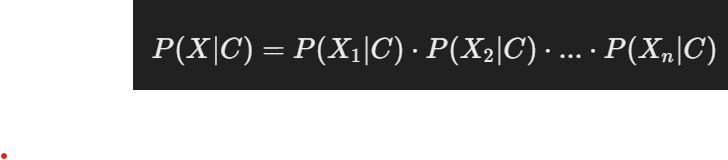



5. Prediksi Kelas
Setelah menghitung
𝑃
(
𝐶
∣
𝑋
)
P(C∣X) untuk setiap kelas, kita pilih kelas dengan probabilitas terbesar:

  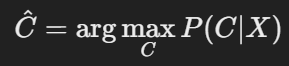

  Jadi, kelas dengan nilai posterior probability tertinggi adalah prediksi kita.

# Kenapa Naïve Bayes Disebut "Naïve"?

Karena Naïve Bayes mengasumsikan bahwa semua fitur saling independen satu sama lain.

Contoh: Jika kita ingin memprediksi apakah sebuah bunga adalah setosa berdasarkan panjang sepal dan lebar petal, maka model menganggap panjang sepal tidak dipengaruhi oleh lebar petal, padahal di dunia nyata mungkin ada korelasi.



# Jenis-Jenis Naïve Bayes

Ada beberapa jenis Naïve Bayes tergantung jenis data:

Gaussian Naïve Bayes → Untuk data numerik (mengasumsikan distribusi normal).

Multinomial Naïve Bayes → Untuk teks atau data frekuensi kata.

Bernoulli Naïve Bayes → Untuk data biner (misal: ada/tidak ada fitur tertentu).



# Kelebihan dan Kekurangan Naïve Bayes

✅ Kelebihan

✔️ Cepat & efisien untuk dataset besar.

✔️ Bekerja baik untuk data teks (digunakan dalam deteksi spam, analisis sentimen, dll.).

✔️ Tidak butuh banyak data untuk mulai bekerja.

❌ Kekurangan

❌ Asumsi independensi fitur jarang benar di dunia nyata.

❌ Tidak selalu bekerja baik jika fitur saling bergantung.

# CODENYA

1.Install beberapa library

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 38.9 MB/s eta 0:00:00


In [ ]:
!pip install pandas

2. Mengambil database mysql dari dbeaver

In [ ]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-3d9be5d4-irismysqll.g.aivencloud.com"
MYSQL_PORT = 28758  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_9SRQX7luHCPCP1wxyhh"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+---------------+
|     |   id | Class           |   petal length |   petal width |
|-----+------+-----------------+----------------+---------------|
|   0 |    1 | Iris-setosa     |           86.4 |          70   |
|   1 |    2 | Iris-setosa     |            1.4 |           0.2 |
|   2 |    3 | Iris-setosa     |            1.3 |           0.2 |
|   3 |    4 | Iris-setosa     |            1.5 |           0.2 |
|   4 |    5 | Iris-setosa     |            1.4 |           0.2 |
|   5 |    6 | Iris-setosa     |            1.7 |           0.4 |
|   6 |    7 | Iris-setosa     |            1.4 |           0.3 |
|   7 |    8 | Iris-setosa     |            1.5 |           0.2 |
|   8 |    9 | Iris-setosa     |            1.4 |           0.2 |
|   9 |   10 | Iris-setosa     |            1.5 |           0.1 |
|  10 |   11 | Iris-setosa     |            1.5 |           0.2 |
|  11 |   12 | Iris-setosa     |            1.6 |           0.2 |
|  12 |   

3. Mengambil database posgre dari dbeaver

In [ ]:
import psycopg2
import pandas as pd
from tabulate import tabulate

PG_HOST = "pg-ee5fcb6-irisposgresqll.g.aivencloud.com"
PG_PORT = "13492"
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_82XRmz2cSUlzQs353EZ"

try:
    conn = psycopg2.connect(
        host=PG_HOST,
        port=PG_PORT,
        dbname=PG_NAME,
        user=PG_USER,
        password=PG_PASS,
        sslmode="require"
    )
    cur = conn.cursor()

    # Menjalankan query
    cur.execute("SELECT * FROM irispostgresql.newtable;")  # Ganti dengan nama skema & tabel yang benar
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+---------------+-----------------+--------------+
|     |   id | Class           |   sepal length |   sepal width |   outlier_score | is_outlier   |
|-----+------+-----------------+----------------+---------------+-----------------+--------------|
|   0 |    2 | Iris-setosa     |            4.9 |           3   |        0.173205 | False        |
|   1 |   11 | Iris-setosa     |            5.4 |           3.7 |        0.331662 | False        |
|   2 |   12 | Iris-setosa     |            4.8 |           3.4 |        0.3      | False        |
|   3 |   13 | Iris-setosa     |            4.8 |           3   |        0.173205 | False        |
|   4 |   14 | Iris-setosa     |            4.3 |           3   |        0.479583 | False        |
|   5 |   15 | Iris-setosa     |            5.8 |           4   |        0.556776 | False        |
|   6 |   16 | Iris-setosa     |            5.7 |           4.4 |        0.616441 | False        |
|   7 |   

4. Gabungkan kedua database menjadi satu

In [ ]:
import psycopg2
import pymysql
import pandas as pd
from tabulate import tabulate

DB_HOST = "mysql-3d9be5d4-irismysqll.g.aivencloud.com"
DB_PORT = 28758
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_9SRQX7luHCPCP1wxyhh"

PG_HOST = "pg-ee5fcb6-irisposgresqll.g.aivencloud.com"
PG_PORT = 13492
PG_NAME = "defaultdb"
PG_USER = "avnadmin"
PG_PASS = "AVNS_82XRmz2cSUlzQs353EZ"

try:
    conn = psycopg2.connect(
        host=PG_HOST, port=PG_PORT, dbname=PG_NAME,
        user=PG_USER, password=PG_PASS, sslmode="require"
    )
    cur = conn.cursor()

    cur.execute("SELECT * FROM irispostgresql.newtable;")
    pg_rows = cur.fetchall()
    pg_columns = [desc[0] for desc in cur.description]
    pg_df = pd.DataFrame(pg_rows, columns=pg_columns)

    mysql_conn = pymysql.connect(
        host=DB_HOST, port=DB_PORT, user=DB_USER,
        password=DB_PASS, database=DB_NAME,
        cursorclass=pymysql.cursors.DictCursor
    )
    mysql_cur = mysql_conn.cursor()

    mysql_cur.execute("SELECT * FROM defaultdb.irissql;")
    mysql_rows = mysql_cur.fetchall()
    mysql_df = pd.DataFrame(mysql_rows)

    pg_df = pg_df[["id", "Class", "sepal length", "sepal width"]]
    mysql_df = mysql_df[["id", "petal length", "petal width"]]

    combined_df = pd.merge(pg_df, mysql_df, on="id", how="inner")

    ordered_columns = ["id", "Class", "sepal length", "sepal width", "petal length", "petal width"]
    combined_df = combined_df[ordered_columns]

    df_selected = pd.concat([
        combined_df.head(3),
        pd.DataFrame([["..."] * len(combined_df.columns)], columns=combined_df.columns),
        combined_df.tail(3)
    ])

    print(tabulate(df_selected, headers="keys", tablefmt="psql", showindex=False))

except Exception as e:
    print("Error:", e)

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()
    if mysql_cur:
        mysql_cur.close()
    if mysql_conn:
        mysql_conn.close()

print("Total jumlah data setelah digabung:", len(combined_df))
print("Jumlah data per kelas:\n", combined_df['Class'].value_counts())


+------+----------------+----------------+---------------+----------------+---------------+
| id   | Class          | sepal length   | sepal width   | petal length   | petal width   |
|------+----------------+----------------+---------------+----------------+---------------|
| 2    | Iris-setosa    | 4.9            | 3.0           | 1.4            | 0.2           |
| 11   | Iris-setosa    | 5.4            | 3.7           | 1.5            | 0.2           |
| 12   | Iris-setosa    | 4.8            | 3.4           | 1.6            | 0.2           |
| ...  | ...            | ...            | ...           | ...            | ...           |
| 149  | Iris-virginica | 6.2            | 3.4           | 5.4            | 2.3           |
| 150  | Iris-virginica | 5.9            | 3.0           | 5.1            | 1.8           |
| 1    | Iris-setosa    | 20.1           | 30.5          | 86.4           | 70.0          |
+------+----------------+----------------+---------------+----------------+-----

5. Naive Bayes dengan outlier

Prior probability

In [ ]:
# Menghitung jumlah total sampel
total_samples = len(combined_df)

# Menghitung prior probability untuk setiap kelas
prior_probs = combined_df['Class'].value_counts(normalize=True).to_dict()

# Menampilkan hasil
print("Prior Probability untuk setiap kelas:\n", prior_probs)


Prior Probability untuk setiap kelas:
 {'Iris-setosa': 0.3333333333333333, 'Iris-versicolor': 0.3333333333333333, 'Iris-virginica': 0.3333333333333333}


Mean dan variance dari tiap fitur per kelas.

In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Menghitung mean dan variance untuk setiap fitur berdasarkan kelas
class_labels = combined_df["Class"].unique()
columns = combined_df.columns[2:]  # Ambil fitur (tanpa id dan class)

stats_list = []

for class_label in class_labels:
    subset = combined_df[combined_df["Class"] == class_label]  # Data per kelas
    mean = subset.iloc[:, 2:].mean().values  # Mean (μ)
    variance = subset.iloc[:, 2:].var().values  # Variance (σ²)

    for col, m, v in zip(columns, mean, variance):
        stats_list.append([class_label, col, m, v])

# Buat DataFrame
stats_df = pd.DataFrame(stats_list, columns=["Class", "Feature", "Mean", "Variance"])

# Tampilkan dalam format tabel
print(tabulate(stats_df, headers="keys", tablefmt="psql", showindex=False))


+-----------------+--------------+--------+-------------+
| Class           | Feature      |   Mean |    Variance |
|-----------------+--------------+--------+-------------|
| Iris-setosa     | sepal length |  5.306 |   4.6818    |
| Iris-setosa     | sepal width  |  3.958 |  14.8155    |
| Iris-setosa     | petal length |  3.164 | 144.308     |
| Iris-setosa     | petal width  |  1.64  |  97.3269    |
| Iris-versicolor | sepal length |  5.936 |   0.266433  |
| Iris-versicolor | sepal width  |  2.77  |   0.0984694 |
| Iris-versicolor | petal length |  4.26  |   0.220816  |
| Iris-versicolor | petal width  |  1.326 |   0.0391061 |
| Iris-virginica  | sepal length |  6.588 |   0.404343  |
| Iris-virginica  | sepal width  |  2.974 |   0.104004  |
| Iris-virginica  | petal length |  5.552 |   0.304588  |
| Iris-virginica  | petal width  |  2.026 |   0.0754327 |
+-----------------+--------------+--------+-------------+


Hitung likelihood

In [ ]:
import numpy as np

# Fungsi untuk menghitung likelihood dengan pengecekan nilai kecil
def likelihood(x, mean, variance):
    likelihood_value = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-0.5 * ((x - mean) ** 2) / variance)
    if likelihood_value == 0:
        likelihood_value = 1e-300  # pakai angka sangat kecil biar tetap valid
    return likelihood_value

# Loop untuk menghitung likelihood untuk seluruh dataset (combined_df dengan outlier)
for index, row in combined_df.iterrows():  # Menggunakan combined_df (data dengan outlier)
    true_class = row['Class']
    sample = row[columns].values

    likelihoods_by_class = {}

    # Hitung likelihood untuk setiap kelas
    for class_label in class_labels:
        class_likelihoods = []
        for feature, value in zip(columns, sample):
            mean = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Mean'].values[0]
            variance = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Variance'].values[0]
            likelihood_value = likelihood(value, mean, variance)
            class_likelihoods.append(np.float64(likelihood_value))
        likelihoods_by_class[class_label] = class_likelihoods

    # Print hasil per data
    print(f"Data {index + 1}: class = {true_class}")
    print(f"data column = {sample}")
    print(f"Likelihoods: {likelihoods_by_class}\n")


Data 1: class = Iris-setosa
data column = [4.9 3.0 1.4 0.2]
Likelihoods: {'Iris-setosa': [np.float64(0.18115834934648242), np.float64(0.10048467138036767), np.float64(0.0328535607257874), np.float64(0.040009866418406585)], 'Iris-versicolor': [np.float64(0.1031244047781986), np.float64(0.9718584132539118), np.float64(7.677269116928307e-09), np.float64(1.8389329771124836e-07)], 'Iris-virginica': [np.float64(0.018506779675120297), np.float64(1.2330295149586665), np.float64(3.7061358902767857e-13), np.float64(3.6625422944600594e-10)]}

Data 2: class = Iris-setosa
data column = [5.4 3.7 1.5 0.2]
Likelihoods: {'Iris-setosa': [np.float64(0.1842017760874033), np.float64(0.10341311304671091), np.float64(0.03289260529168439), np.float64(0.040009866418406585)], 'Iris-versicolor': [np.float64(0.4507804886111316), np.float64(0.01573836434002876), np.float64(2.7407446100951893e-08), np.float64(1.8389329771124836e-07)], 'Iris-virginica': [np.float64(0.10954451854991003), np.float64(0.0981561452420207

Hitung posterior probability

In [ ]:
import numpy as np

# Fungsi untuk menghitung posterior probability
def calculate_posterior(prior_probs, likelihoods_by_class): # Changed likelihoods to likelihoods_by_class
    posterior_probs = {}
    for class_label in prior_probs.keys():
        prior = prior_probs[class_label]
        posterior = np.log(prior)  # Mulai dengan log dari prior probability
        for likelihood_value in likelihoods_by_class[class_label]: # Changed likelihoods to likelihoods_by_class
            posterior += np.log(likelihood_value)
        posterior_probs[class_label] = np.exp(posterior)  # Mengembalikan nilai probabilitas posterior
    return posterior_probs

# Loop untuk menghitung posterior probability untuk setiap data
posterior_probs_all_data = []

for index, row in combined_df.iterrows():  # Loop untuk setiap data di dataset
    X = row[columns].values  # Ambil fitur untuk data ini
    posterior_probs_data = {}

    likelihoods_by_class_all = {} # Creating a dictionary to hold all likelihoods for each class for data in this loop

    for class_label in class_labels:
        likelihoods_by_class = []
        for feature, value in zip(columns, X):
            mean = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Mean'].values[0]
            variance = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Variance'].values[0]
            likelihood_value = likelihood(value, mean, variance)
            likelihoods_by_class.append(np.float64(likelihood_value))  # Tambahkan likelihood untuk setiap feature

        likelihoods_by_class_all[class_label] = likelihoods_by_class # Store the likelihoods for current class

    # Hitung posterior probabilities untuk kelas ini
    posterior_prob = calculate_posterior(prior_probs, likelihoods_by_class_all) # Changed likelihoods to likelihoods_by_class_all which has the prior probs for all classes for current data
    posterior_probs_data.update(posterior_prob)

    posterior_probs_all_data.append(posterior_probs_data)

# Tampilkan posterior probability untuk setiap data
for i, posterior_probs_data in enumerate(posterior_probs_all_data):
    print(f"Data {i+1}: class = {combined_df['Class'][i]}")
    print(f"Posterior Probabilities: {posterior_probs_data}")
    print()

Data 1: class = Iris-setosa
Posterior Probabilities: {'Iris-setosa': np.float64(7.97602422121912e-06), 'Iris-versicolor': np.float64(4.716456836571174e-17), 'Iris-virginica': np.float64(1.032492867373868e-24)}

Data 2: class = Iris-setosa
Posterior Probabilities: {'Iris-setosa': np.float64(8.356290808729364e-06), 'Iris-versicolor': np.float64(1.1918947857154741e-17), 'Iris-virginica': np.float64(1.8705610945275753e-24)}

Data 3: class = Iris-setosa
Posterior Probabilities: {'Iris-setosa': np.float64(8.0806425414617e-06), 'Iris-versicolor': np.float64(6.662731640927405e-17), 'Iris-virginica': np.float64(4.029295758952699e-24)}

Data 4: class = Iris-setosa
Posterior Probabilities: {'Iris-setosa': np.float64(7.886633017407483e-06), 'Iris-versicolor': np.float64(1.5508970267350262e-18), 'Iris-virginica': np.float64(5.586351829320782e-26)}

Data 5: class = Iris-setosa
Posterior Probabilities: {'Iris-setosa': np.float64(7.246018445383859e-06), 'Iris-versicolor': np.float64(1.927424578461321e

Memprediksi kelas tiap sampel dalam dataset

In [ ]:
# Fungsi untuk menghitung prediksi kelas berdasarkan posterior probability
def predict_class(posterior_values):
    return max(posterior_values, key=posterior_values.get)

# Menghitung prediksi untuk seluruh dataset
predictions = []
y_true = combined_df['Class'].values  # Gunakan data kelas yang sebenarnya

# Menggunakan perhitungan posterior pada tiap sample
for index, row in combined_df.iterrows():
    sample = row[columns].values  # Ambil nilai fitur untuk data ini
    posterior_values = {}  # Menyimpan posterior untuk tiap kelas

    for class_label in class_labels:
        prior_prob = prior_probs[class_label]
        posterior = np.log(prior_prob)  # Log dari prior probability untuk menghindari overflow
        for feature, value in zip(columns, sample):
            mean = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Mean'].values[0]
            variance = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Variance'].values[0]
            likelihood_value = likelihood(value, mean, variance)
            posterior += np.log(likelihood_value)  # Log dari likelihood untuk setiap fitur

        posterior_values[class_label] = posterior  # Tambahkan posterior untuk kelas ini

    prediction = predict_class(posterior_values)  # Prediksi berdasarkan nilai posterior
    predictions.append((index + 1, combined_df['Class'][index], sample, prediction))  # Simpan hasil prediksi

# Tampilkan hasil prediksi dalam format yang diinginkan
for data_num, true_class, data_column, predicted_class in predictions:
    print(f"Data {data_num}: class = {true_class}")
    print(f"data column = {data_column}")
    print(f"Predicted = {predicted_class}")
    print()


Data 1: class = Iris-setosa
data column = [4.9 3.0 1.4 0.2]
Predicted = Iris-setosa

Data 2: class = Iris-setosa
data column = [5.4 3.7 1.5 0.2]
Predicted = Iris-setosa

Data 3: class = Iris-setosa
data column = [4.8 3.4 1.6 0.2]
Predicted = Iris-setosa

Data 4: class = Iris-setosa
data column = [4.8 3.0 1.4 0.1]
Predicted = Iris-setosa

Data 5: class = Iris-setosa
data column = [4.3 3.0 1.1 0.1]
Predicted = Iris-setosa

Data 6: class = Iris-setosa
data column = [5.8 4.0 1.2 0.2]
Predicted = Iris-setosa

Data 7: class = Iris-setosa
data column = [5.7 4.4 1.5 0.4]
Predicted = Iris-setosa

Data 8: class = Iris-setosa
data column = [5.4 3.9 1.3 0.4]
Predicted = Iris-setosa

Data 9: class = Iris-setosa
data column = [5.1 3.5 1.4 0.3]
Predicted = Iris-setosa

Data 10: class = Iris-setosa
data column = [5.7 3.8 1.7 0.3]
Predicted = Iris-setosa

Data 11: class = Iris-setosa
data column = [5.1 3.8 1.5 0.3]
Predicted = Iris-setosa

Data 12: class = Iris-setosa
data column = [5.4 3.4 1.7 0.2]
Pr

NILAI AKURASI

In [ ]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi
y_true = combined_df['Class'].values  # Data kelas yang sebenarnya
y_pred = [prediction for _, _, _, prediction in predictions]  # Mengambil prediksi

accuracy = accuracy_score(y_true, y_pred)  # Menghitung akurasi

# Tampilkan akurasi
print(f"Akurasi model Naive Bayes: {accuracy * 100:.2f}%")


Akurasi model Naive Bayes: 96.00%


7.Naive Bayes tanpa Outlier

Hapus outlier

In [ ]:
# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
# Only include numeric columns for quantile calculation
numeric_cols = combined_df.select_dtypes(include=np.number).columns[2:]
Q1 = combined_df[numeric_cols].quantile(0.25)
Q3 = combined_df[numeric_cols].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk menghapus outlier berdasarkan batas bawah dan atas
# Apply filtering to numeric columns only
cleaned_df = combined_df[~((combined_df[numeric_cols] < lower_bound) | (combined_df[numeric_cols] > upper_bound)).any(axis=1)]

# Menampilkan data setelah pembersihan outlier
print("Data setelah menghapus outlier:")
print(cleaned_df.head())

Data setelah menghapus outlier:
   id        Class  sepal length  sepal width  petal length  petal width
0   2  Iris-setosa           4.9          3.0           1.4          0.2
1  11  Iris-setosa           5.4          3.7           1.5          0.2
2  12  Iris-setosa           4.8          3.4           1.6          0.2
3  13  Iris-setosa           4.8          3.0           1.4          0.1
4  14  Iris-setosa           4.3          3.0           1.1          0.1


Hitung Prior Probability

In [ ]:
# Menghitung jumlah total sampel setelah menghapus outlier
total_samples = len(cleaned_df)

# Menghitung prior probability untuk setiap kelas setelah menghapus outlier
prior_probs = cleaned_df['Class'].value_counts(normalize=True).to_dict()

# Menampilkan hasil
print("Prior Probability untuk setiap kelas setelah menghapus outlier:\n", prior_probs)


Prior Probability untuk setiap kelas setelah menghapus outlier:
 {'Iris-virginica': 0.3448275862068966, 'Iris-versicolor': 0.33793103448275863, 'Iris-setosa': 0.31724137931034485}


Hitung parameter distribusi gaussian (mean dan variance)

In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Ambil data yang telah dibersihkan (tanpa outlier)
class_labels = cleaned_df["Class"].unique()
columns = cleaned_df.select_dtypes(include=[np.number]).columns  # Ambil kolom numerik saja

# Print kolom yang digunakan untuk statistik
print(f"Fitur yang diproses: {columns}")

stats_list = []

for class_label in class_labels:
    # Ambil subset data berdasarkan kelas
    subset = cleaned_df[cleaned_df["Class"] == class_label]

    # Menghitung mean dan variance untuk fitur numerik
    mean = subset[columns].mean().values  # Mean untuk fitur numerik
    variance = subset[columns].var().values  # Variance untuk fitur numerik

    # Menyimpan hasil statistik
    for col, m, v in zip(columns, mean, variance):
        stats_list.append([class_label, col, m, v])

# Membuat DataFrame hasil statistik
stats_df = pd.DataFrame(stats_list, columns=["Class", "Feature", "Mean", "Variance"])

# Menampilkan hasil statistik dalam format tabel
print(tabulate(stats_df, headers="keys", tablefmt="psql", showindex=False))


Fitur yang diproses: Index(['id', 'sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')
+-----------------+--------------+------------+-------------+
| Class           | Feature      |       Mean |    Variance |
|-----------------+--------------+------------+-------------|
| Iris-setosa     | id           |  25.8913   | 213.032     |
| Iris-setosa     | sepal length |   4.97391  |   0.117082  |
| Iris-setosa     | sepal width  |   3.36304  |   0.109493  |
| Iris-setosa     | petal length |   1.46522  |   0.0325411 |
| Iris-setosa     | petal width  |   0.245652 |   0.0114251 |
| Iris-versicolor | id           |  75.7959   | 212.457     |
| Iris-versicolor | sepal length |   5.9551   |   0.253359  |
| Iris-versicolor | sepal width  |   2.78571  |   0.0879167 |
| Iris-versicolor | petal length |   4.27551  |   0.213138  |
| Iris-versicolor | petal width  |   1.33265  |   0.0376616 |
| Iris-virginica  | id           | 125.5      | 212.5       |
| Iris-virginica  |

Hitung likelihood

In [ ]:
import numpy as np

# Fungsi untuk menghitung likelihood dengan pengecekan nilai kecil
def likelihood(x, mean, variance):
    likelihood_value = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-0.5 * ((x - mean) ** 2) / variance)
    if likelihood_value == 0:
        likelihood_value = 1e-300  # pakai angka sangat kecil biar tetap valid
    return likelihood_value

# Loop untuk menghitung likelihood untuk seluruh dataset (cleaned_df)
for index, row in cleaned_df.iterrows():  # Menggunakan cleaned_df yang sudah dibersihkan dari outlier
    true_class = row['Class']
    sample = row[columns].values

    likelihoods_by_class = {}

    # Hitung likelihood untuk setiap kelas
    for class_label in class_labels:
        class_likelihoods = []
        for feature, value in zip(columns, sample):
            mean = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Mean'].values[0]
            variance = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Variance'].values[0]
            likelihood_value = likelihood(value, mean, variance)
            class_likelihoods.append(np.float64(likelihood_value))
        likelihoods_by_class[class_label] = class_likelihoods

    # Print hasil per data
    print(f"Data {index + 1}: class = {true_class}")
    print(f"data column = {sample}")
    print(f"Likelihoods: {likelihoods_by_class}\n")


Data 1: class = Iris-setosa
data column = [2 4.9 3.0 1.4 0.2]
Likelihoods: {'Iris-setosa': [np.float64(0.0071592501929136415), np.float64(1.1390230605318254), np.float64(0.660433407022914), np.float64(2.0716280315300377), np.float64(3.4069723426827037)], 'Iris-versicolor': [np.float64(7.434055425796044e-08), np.float64(0.08808721131258622), np.float64(1.0362384644093752), np.float64(3.254431969425003e-09), np.float64(8.242531522423601e-08)], 'Iris-virginica': [np.float64(7.102700669313924e-18), np.float64(0.018506779675120297), np.float64(1.2330295149586665), np.float64(3.7061358902767857e-13), np.float64(3.6625422944600594e-10)]}

Data 2: class = Iris-setosa
data column = [11 5.4 3.7 1.5 0.2]
Likelihoods: {'Iris-setosa': [np.float64(0.016242506328387717), np.float64(0.5369718566700007), np.float64(0.7178673346238256), np.float64(2.1708058211580603), np.float64(3.4069723426827037)], 'Iris-versicolor': [np.float64(1.399863351164034e-06), np.float64(0.4314642049558728), np.float64(0.0115

Hitung posterior probability

In [ ]:
import numpy as np

# Fungsi untuk menghitung posterior probability
def calculate_posterior(prior_probs, likelihoods_by_class):
    posterior_probs = {}
    for class_label in prior_probs.keys(): # loop through all class labels
        prior = prior_probs[class_label]
        posterior = np.log(prior)  # Mulai dengan log dari prior probability
        for likelihood_value in likelihoods_by_class[class_label]: # access the likelihood for the current class
            posterior += np.log(likelihood_value)
        posterior_probs[class_label] = np.exp(posterior)  # Mengembalikan nilai probabilitas posterior
    return posterior_probs

# Loop untuk menghitung posterior probability untuk setiap data
# Tampilkan posterior probability untuk setiap data
posterior_probs_all_data = []

for index, row in cleaned_df.iterrows():  # Loop untuk setiap data di dataset yang sudah dibersihkan
    X = row[columns].values  # Ambil fitur untuk data ini

    likelihoods_by_class = {} # reinitialize for every row

    #calculate likelihood for every class and put it in a dict
    for class_label in class_labels:
        likelihoods_for_class = []
        for feature, value in zip(columns, X):
            if class_label in stats_df['Class'].values:  # Cek apakah kelas ada
                mean = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Mean'].values[0]
                variance = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Variance'].values[0]
                likelihood_value = likelihood(value, mean, variance)
            else:
                likelihood_value = 1e-10  # Jika kelas tidak ada, gunakan nilai kecil untuk likelihood
            likelihoods_for_class.append(np.float64(likelihood_value))  # Tambahkan likelihood untuk setiap feature

        likelihoods_by_class[class_label] = likelihoods_for_class # Add to likelihoods_by_class for this row

    # Hitung posterior probabilities untuk kelas ini, using the full likelihoods_by_class for this row
    posterior_probs_data = calculate_posterior(prior_probs, likelihoods_by_class)

    posterior_probs_all_data.append(posterior_probs_data)

# Tampilkan posterior probability untuk setiap data
for index, posterior_probs_data in enumerate(posterior_probs_all_data):
    print(f"Data {index+1}: class = {cleaned_df['Class'].iloc[index]}") #use .iloc to access row based on position
    print(f"Posterior Probabilities: {posterior_probs_data}")
    print()

Data 1: class = Iris-setosa
Posterior Probabilities: {'Iris-virginica': np.float64(7.58636666912923e-42), 'Iris-versicolor': np.float64(6.151234119931868e-25), 'Iris-setosa': np.float64(0.012058667113885587)}

Data 2: class = Iris-setosa
Posterior Probabilities: {'Iris-virginica': np.float64(2.123062871590199e-39), 'Iris-versicolor': np.float64(2.389729949372968e-24), 'Iris-setosa': np.float64(0.014690215810861865)}

Data 3: class = Iris-setosa
Posterior Probabilities: {'Iris-virginica': np.float64(7.819992219905869e-39), 'Iris-versicolor': np.float64(2.0811726273780243e-23), 'Iris-setosa': np.float64(0.03857427566540622)}

Data 4: class = Iris-setosa
Posterior Probabilities: {'Iris-virginica': np.float64(1.845219076629239e-40), 'Iris-versicolor': np.float64(5.90787107443103e-25), 'Iris-setosa': np.float64(0.012138490417179662)}

Data 5: class = Iris-setosa
Posterior Probabilities: {'Iris-virginica': np.float64(3.633044887933762e-43), 'Iris-versicolor': np.float64(6.9990921083185105e-2

Memprediksi kelas tiap sampel dalam dataset

In [ ]:
# Fungsi untuk menghitung prediksi kelas berdasarkan posterior probability
def predict_class(posterior_values):
    return max(posterior_values, key=posterior_values.get)

# Menghitung prediksi untuk seluruh dataset
predictions = []
y_true = cleaned_df['Class'].values  # Gunakan cleaned_df yang sudah dihapus outliernya

# Menggunakan perhitungan posterior pada tiap sample
for index, row in cleaned_df.iterrows():  # Ganti combined_df dengan cleaned_df
    sample = row[columns].values  # Ambil nilai fitur untuk data ini
    posterior_values = {}  # Menyimpan posterior untuk tiap kelas

    for class_label in class_labels:
        prior_prob = prior_probs[class_label]
        posterior = np.log(prior_prob)  # Log dari prior probability untuk menghindari overflow
        for feature, value in zip(columns, sample):
            mean = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Mean'].values[0]
            variance = stats_df[(stats_df['Class'] == class_label) & (stats_df['Feature'] == feature)]['Variance'].values[0]
            likelihood_value = likelihood(value, mean, variance)
            posterior += np.log(likelihood_value)  # Log dari likelihood untuk setiap fitur

        posterior_values[class_label] = posterior  # Tambahkan posterior untuk kelas ini

    prediction = predict_class(posterior_values)  # Prediksi berdasarkan nilai posterior
    predictions.append((index + 1, cleaned_df['Class'][index], sample, prediction))  # Simpan hasil prediksi

# Tampilkan hasil prediksi dalam format yang diinginkan
for data_num, true_class, data_column, predicted_class in predictions:
    print(f"Data {data_num}: class = {true_class}")
    print(f"data column = {data_column}")
    print(f"Predicted = {predicted_class}")
    print()


Data 1: class = Iris-setosa
data column = [2 4.9 3.0 1.4 0.2]
Predicted = Iris-setosa

Data 2: class = Iris-setosa
data column = [11 5.4 3.7 1.5 0.2]
Predicted = Iris-setosa

Data 3: class = Iris-setosa
data column = [12 4.8 3.4 1.6 0.2]
Predicted = Iris-setosa

Data 4: class = Iris-setosa
data column = [13 4.8 3.0 1.4 0.1]
Predicted = Iris-setosa

Data 5: class = Iris-setosa
data column = [14 4.3 3.0 1.1 0.1]
Predicted = Iris-setosa

Data 6: class = Iris-setosa
data column = [15 5.8 4.0 1.2 0.2]
Predicted = Iris-setosa

Data 8: class = Iris-setosa
data column = [17 5.4 3.9 1.3 0.4]
Predicted = Iris-setosa

Data 9: class = Iris-setosa
data column = [18 5.1 3.5 1.4 0.3]
Predicted = Iris-setosa

Data 10: class = Iris-setosa
data column = [19 5.7 3.8 1.7 0.3]
Predicted = Iris-setosa

Data 11: class = Iris-setosa
data column = [20 5.1 3.8 1.5 0.3]
Predicted = Iris-setosa

Data 12: class = Iris-setosa
data column = [21 5.4 3.4 1.7 0.2]
Predicted = Iris-setosa

Data 13: class = Iris-setosa
d

NILAI AKURASI

In [54]:
from sklearn.metrics import accuracy_score

# Menghitung akurasi
y_true = cleaned_df['Class'].values  # Data kelas yang sebenarnya (menggunakan cleaned_df)
y_pred = [prediction for _, _, _, prediction in predictions]  # Mengambil prediksi

accuracy = accuracy_score(y_true, y_pred)  # Menghitung akurasi

# Tampilkan akurasi
print(f"Akurasi model Naive Bayes dengan data yang dibersihkan: {accuracy * 100:.2f}%")


Akurasi model Naive Bayes dengan data yang dibersihkan: 99.31%


# PENJELASAN CODE BARIS PER BARIS